# Summary

Example notebook for writing a `TFRecord` and then reading it back

Library versions:

```
Python 2.7.16
tensorflow 1.12.0
```

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os.path
import sys
import time

import tensorflow as tf

from tensorflow.contrib.learn.python.learn.datasets import mnist
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# convert image to TF Record

In [2]:
class FLAGS(object):
    directory = '/tmp/data'
    validation_size = 5000
    
data_sets = mnist.read_data_sets(FLAGS.directory,
                                   dtype=tf.uint8,
                                   reshape=False,
                                   validation_size=FLAGS.validation_size)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
data_set = data_sets.validation
data_set

In [4]:
data_set.num_examples

5000

In [5]:
type(data_set.images)

numpy.ndarray

In [6]:
data_set.images.shape

(5000, 28, 28, 1)

In [7]:
data_set.labels.shape

(5000,)

In [8]:
data_set.labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
images = data_set.images
labels = data_set.labels
num_examples = data_set.num_examples

In [10]:
N = images.shape[0]
rows = images.shape[1]
cols = images.shape[2]
depth = images.shape[3]

In [11]:
N, rows, cols, depth

(5000, 28, 28, 1)

In [12]:
index = 0
image_to_read = images[index]
image_to_read.shape, type(image_to_read)

((28, 28, 1), numpy.ndarray)

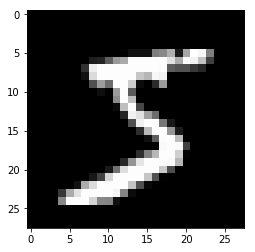

In [13]:
def display_image(img):
    stacked_img = np.stack((np.squeeze(img),)*3, axis=-1)

    assert stacked_img.shape == (28, 28, 3)

    plt.imshow(stacked_img, cmap=plt.get_cmap('gray'))
    
display_image(image_to_read)

In [14]:
name = 'validation'
filename = os.path.join(FLAGS.directory, name + '.tfrecords')
filename

'/tmp/data/validation.tfrecords'

In [15]:
type(images[index].tostring())

str

In [16]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [17]:
image_raw = images[index].tostring()

In [18]:
_int64_feature(rows)

int64_list {
  value: 28
}

In [19]:
type(_int64_feature(rows))

tensorflow.core.example.feature_pb2.Feature

In [20]:
tf.train.Int64List

tensorflow.core.example.feature_pb2.Int64List

In [21]:
type(_bytes_feature(image_raw))

tensorflow.core.example.feature_pb2.Feature

In [22]:
example = tf.train.Example(
          features=tf.train.Features(
              feature={
                  'height': _int64_feature(rows),
                  'width': _int64_feature(cols),
                  'depth': _int64_feature(depth),
                  'label': _int64_feature(int(labels[index])),
                  'image_raw': _bytes_feature(image_raw)
              }))
example

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 28
      }
    }
  }
  feature {
    key: "image_raw"
    value {
      bytes_list {
        value: "\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\003\022\022\022~\210\257\032\246\377\367\177\000\000\000\000\000\000\000\000\000\000\000\000\036$^\232\252\3

In [23]:
type(labels[index])

numpy.uint8

In [24]:
for x in [rows, cols, depth]:
    print(x, type(x))

28 <type 'int'>
28 <type 'int'>
1 <type 'int'>


In [25]:
tfrecord = example.SerializeToString()
tfrecord

"\n\xe8\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x05\n\x0e\n\x05depth\x12\x05\x1a\x03\n\x01\x01\n\xa4\x06\n\timage_raw\x12\x96\x06\n\x93\x06\n\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x12\x12\x12~\x88\xaf\x1a\xa6\xff\xf7\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e$^\x9a\xaa\xfd\xfd\xfd\xfd\xfd\xe1\xac\xfd\xf2\xc3@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001\xee\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfb]RR8'\x

### summary

takes the image HWC, image-as-a-string, and label and serializes it to the TRRecord format

# read image from TF Record

In [26]:
# different module from above Reader example

from tensorflow.examples.tutorials.mnist import mnist

In [27]:
def decode(serialized_example):
    """Parses an image and label from the given `serialized_example`."""
    features = tf.parse_single_example(
        serialized_example,
        # Defaults are not specified since both keys are required.
        features={
            'image_raw': tf.FixedLenFeature([], tf.string),
            'label': tf.FixedLenFeature([], tf.int64),
        })

    # Convert from a scalar string tensor (whose single string has
    # length mnist.IMAGE_PIXELS) to a uint8 tensor with shape
    # [mnist.IMAGE_PIXELS].
    image = tf.decode_raw(features['image_raw'], tf.uint8)
    image.set_shape((mnist.IMAGE_PIXELS))

    # Convert label from a scalar uint8 tensor to an int32 scalar.
    label = tf.cast(features['label'], tf.int32)

    return image, label


image, label = decode(tfrecord)
image, label

(<tf.Tensor 'DecodeRaw:0' shape=(784,) dtype=uint8>,
 <tf.Tensor 'Cast:0' shape=() dtype=int32>)

In [28]:
image.shape

TensorShape([Dimension(784)])

In [29]:
mnist.IMAGE_PIXELS

784

In [30]:
28*28

784

In [31]:
image_reshaped = tf.reshape(image, (28, 28, 1))
image_reshaped

<tf.Tensor 'Reshape:0' shape=(28, 28, 1) dtype=uint8>

In [32]:
image_reshaped.shape

TensorShape([Dimension(28), Dimension(28), Dimension(1)])

In [33]:
tf.InteractiveSession()

In [34]:
image_reshaped_ndarray = image_reshaped.eval()
type(image_reshaped_ndarray), image_reshaped_ndarray.shape

(numpy.ndarray, (28, 28, 1))

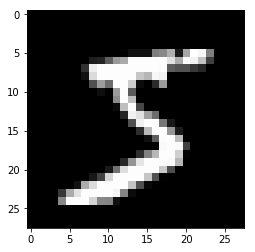

In [35]:
display_image(image_reshaped_ndarray)